# Week 11: An Attempt on Poly-Square Mapping
**Target**: 

In [4]:
# Packages
import numpy as np
import random
import matplotlib.pyplot as plt

# Self-defined functions
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from util import util
from util.mesh_triangle import get_boundary_edge
from util.vector import vector_normalize

# Visualization
import pyvista as pv
from pyvista import examples

from scipy.spatial import Delaunay

In [12]:
def calculate_signed_area(A, B, C):
    return np.cross(np.cross(B-A, C-A)) / 2

def make_clockwise_2D(vertices, faces):
    for i in range(len(faces)):
        A, B, C = vertices[faces[i]]
        if calculate_signed_area(A, B, C) > 0:
            faces[i] = faces[i][::-1]
    return faces

In [6]:
def mesh_clockwise_2D(faces):
    for triangle in faces:
        x1, y1 = points[triangle[0]]
        x2, y2 = points[triangle[1]]
        x3, y3 = points[triangle[2]]
        if (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1) > 0:
            triangle[1], triangle[2] = triangle[2], triangle[1]

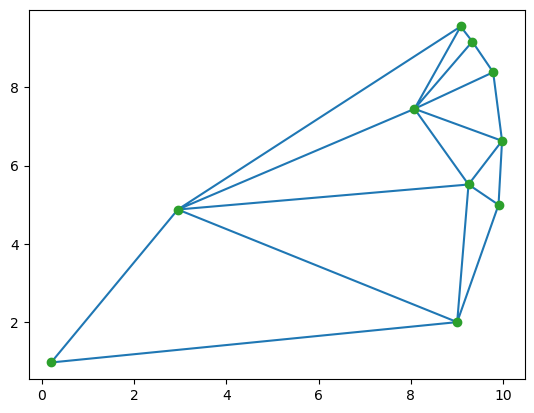

In [13]:
# 100 random points
points = np.random.rand(10, 2)*10

# Delaunay algorithm to triangulate the mesh
tri = Delaunay(points)
mesh_clockwise_2D(tri.simplices)

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

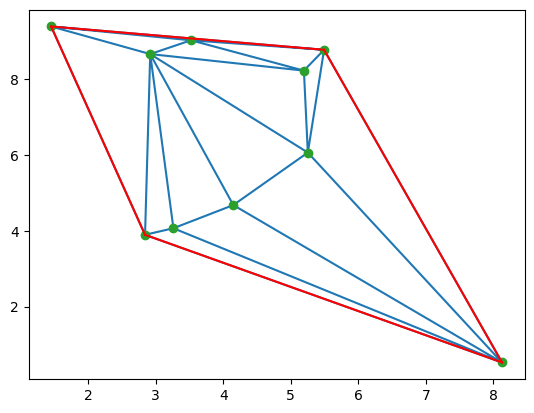

In [5]:
# edges = triangle_edges(tri.simplices)
boundary_edges = triangle_boundary_edges(tri.simplices)

# Plot
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
for edge in boundary_edges:
    plt.plot(points[np.array(edge), 0], points[np.array(edge), 1], 'r-')
plt.show()
